In [1]:
# biblioteca para gerar gráficos dinâmicos
!pip install plotly --upgrade

In [2]:
import pandas as pd # biblioteca para carregamento de arquivos csv
import numpy as np
import seaborn as sns # biblioteca para visualização de gráficos
import matplotlib.pyplot as plt # biblioteca para visualização de gráficos
import plotly.express as px

# Base de dados do censo

Fonte: https://archive.ics.uci.edu/ml/datasets/adult

### Exploração de dados

In [3]:
base_census = pd.read_csv('/content/census.csv')

In [4]:
base_census.head(5)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
base_census.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


### Visualização de dados

In [7]:
np.unique(base_census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

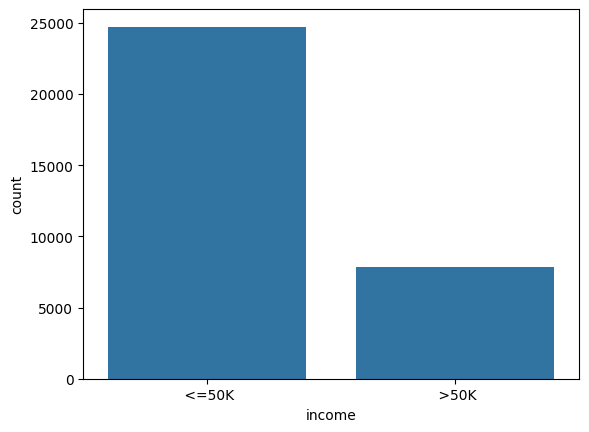

In [8]:
sns.countplot(x = base_census['income']);

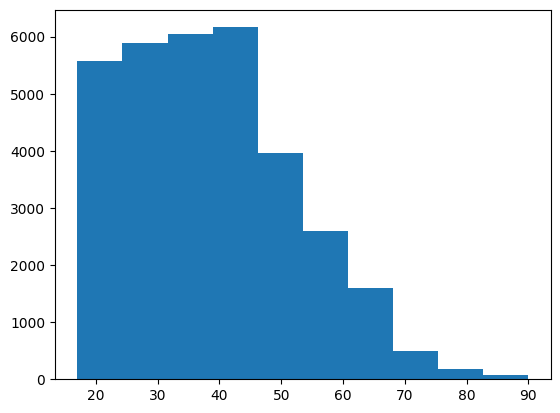

In [9]:
plt.hist(x = base_census['age']);

In [11]:
grafico = px.treemap(base_census, path = ['occupation', 'relationship'])
grafico.show()

In [12]:
grafico = px.parallel_categories(base_census, dimensions = ['education', 'income'])
grafico.show()

### Divisão entre previsores e classes

In [13]:
X_census = base_census.iloc[:, 0:14].values
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [14]:
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### Tratamento dos atributos categóricos

**LabelEncoder**

Desvantagem: ele apenas transforma as categorias em números e nos cálculos matemáticos ele pode considerar a categoria 10 mais importante que a categoria 1

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder_teste = LabelEncoder()

In [15]:
# Vamos agora fazer para cada um dos atributos categóricos (antes foi teste)
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [20]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [21]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [22]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

**OneHotEncoder**

Transforma em variável dummy

In [23]:
# Por exemplo, para a categoria workclass, vamos adicionar nove colunas ao banco de dados
len(np.unique(base_census['workclass']))

9

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
onehotencoder_census = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder = 'passthrough')

In [26]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [27]:
X_census.shape # Agora temos 108 colunas

(32561, 108)

### Escalonamento dos valores

In [28]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

# Divisão das bases em treinamento e teste

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0)

In [32]:
# 85% dos dados
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [33]:
# 15% dos dados
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

### Salvar as bases de dados

In [34]:
import pickle

In [35]:
# Salvando as bases do census
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)